In [1]:
import numpy as np
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

import keras
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
print(np.__version__) 

1.15.4


**Data downloading**

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire_example = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire_example

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

**Data preparation**

In [5]:
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
%%time
x_train = csr_matrix(vectorize_sequence(train_data))
x_test = csr_matrix(vectorize_sequence(test_data))

CPU times: user 1.74 s, sys: 236 ms, total: 1.97 s
Wall time: 1.99 s


Let`s one-hote encode our train/test labels

In [7]:
# def to_one_hot(labels, dimension = 46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1
#     return results

# one_hot_train_labes = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

In [8]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Set model**

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

W0822 17:53:51.362470 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 17:53:51.384643 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 17:53:51.390042 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

W0822 17:53:51.489130 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 17:53:51.525239 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

W0822 17:53:51.855646 139730524071744 deprecation.py:323] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 17:53:51.942939 139730524071744 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 356us/step - loss: 3.2396 - acc: 0.4132 - val_loss: 2.4536 - val_acc: 0.5350
Epoch 2/20
7982/7982 [==============================] - 2s 207us/step - loss: 1.9656 - acc: 0.5740 - val_loss: 1.6403 - val_acc: 0.6200
Epoch 3/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.3934 - acc: 0.6971 - val_loss: 1.3563 - val_acc: 0.7070
Epoch 4/20
7982/7982 [==============================] - 2s 216us/step - loss: 1.1037 - acc: 0.7582 - val_loss: 1.1950 - val_acc: 0.7420
Epoch 5/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.8878 - acc: 0.8071 - val_loss: 1.0824 - val_acc: 0.7640
Epoch 6/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.7112 - acc: 0.8472 - val_loss: 0.9981 - val_acc: 0.7860
Epoch 7/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.5652 - acc: 0.8796 - val_loss: 0.9491 - val_acc: 0.7980


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

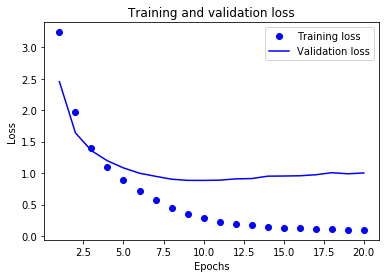

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history.history['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

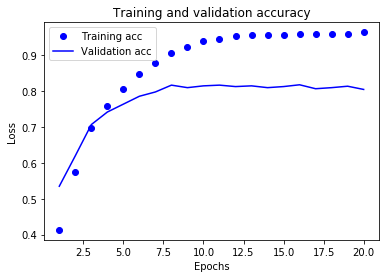

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit after 9-th epoch

**Train model**

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [19]:
model.fit(x_train, one_hot_train_labels,
                   epochs = 9, batch_size = 512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 3s 289us/step - loss: 3.1205 - acc: 0.4343
Epoch 2/9
8982/8982 [==============================] - 2s 168us/step - loss: 1.8128 - acc: 0.6363
Epoch 3/9
8982/8982 [==============================] - 2s 169us/step - loss: 1.2528 - acc: 0.7224
Epoch 4/9
8982/8982 [==============================] - 2s 169us/step - loss: 0.9559 - acc: 0.8007
Epoch 5/9
8982/8982 [==============================] - 2s 169us/step - loss: 0.7377 - acc: 0.8498
Epoch 6/9
8982/8982 [==============================] - 2s 178us/step - loss: 0.5734 - acc: 0.8844
Epoch 7/9
8982/8982 [==============================] - 2s 189us/step - loss: 0.4460 - acc: 0.9071
Epoch 8/9
8982/8982 [==============================] - 2s 168us/step - loss: 0.3507 - acc: 0.9291
Epoch 9/9
2246/2246 [==============================] - 1s 306us/step


In [21]:
results

[0.9268513868031285, 0.7978628673196795]

In [27]:
predictions = model.predict(x_test)
print(np.sum(predictions[0]))

0.99999994


In [32]:
print('Output example of argmax function:\n', predictions[0])
print('The most probable theme`s number of example: ', np.argmax(predictions[0]))

Output example of argmax function:
 [6.06897775e-05 2.13365784e-04 1.01099486e-05 9.48840618e-01
 4.44885716e-02 1.47119636e-05 7.76167872e-06 1.42519557e-05
 1.09012600e-03 3.85498861e-05 7.49369747e-06 1.11950166e-03
 1.09883884e-04 2.50425714e-04 1.43316620e-05 5.77494120e-06
 8.56476661e-04 3.19174615e-05 2.94677484e-05 6.85300911e-04
 5.44371025e-04 1.55394126e-04 2.34063846e-05 1.79053633e-04
 2.60104935e-06 3.49859438e-05 1.90777555e-05 7.96849872e-06
 3.07357041e-05 5.02702373e-04 2.05804772e-05 6.23125889e-05
 7.89603218e-05 4.70722898e-06 2.25890089e-05 1.06517582e-05
 6.78299766e-05 1.24323060e-05 1.10591773e-05 1.61237971e-04
 2.61303808e-06 1.28925443e-04 1.84546172e-06 1.27310268e-05
 6.63309902e-06 5.17239960e-06]
The most probable theme`s number of example:  3
